# On Statistical Distributions and the Central Limit Theorem

In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

A fundamental distinction among kinds of distributions is the distinction between discrete and continuous distributions. A discrete distribution (or variable) takes on countable values, like integers, while a continuous distribution takes on a continuum of values, like real numbers.

## Discrete Distributions

### Probability Mass Function

The $\bf{probability\ mass\ function\ (pmf)}$ for a random variable gives, at any value $k$, the probability that the random variable takes the value $k$. Suppose, for example, that I have a jar full of lottery balls containing:
- 60 "1"s,
- 30 "2"s, and
- 10 "3"s.

We might then represent this function pictorially as follows:

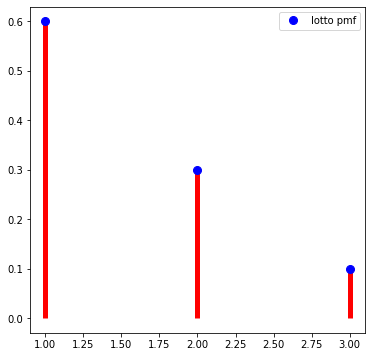

In [2]:
# Plot here!

x = range(1, 4)
lotto_dict = {1: 0.6, 2: 0.3, 3: 0.1}
y = [lotto_dict[num] for num in x]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y, 'bo', ms=8, label='lotto pmf')
ax.vlines(x, 0, y, 'r', lw=5)
ax.legend(loc='best');

There are several functions that commonly appear; the shapes of their graphs should become familiar to you!

### Binomial

The binomial distribution applies when I have a process that has only two outcomes. Suppose some baseball team has a 70% chance of winning any game that it plays. The binomial distribution can tell me what the probability is that the team win exactly $k$ out of $n$ games ($k < n$).

$\Large f(x) = {n \choose k}p^k(1 - p)^{n - k}$

Note: ${n\choose k} = \frac{n!}{k!(n - k)!}$, the number of ways of choosing $k$ objects from a total of $n$.

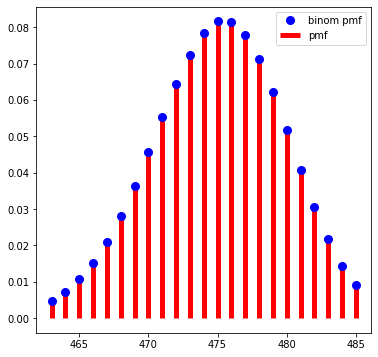

In [3]:
n = 500
p = 0.95
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=5,
          label='pmf')
ax.legend(loc='best');

In [4]:
# Fair coin 5 times. Exactly 3 heads.

stats.binom.pmf(3, 5, 0.5)

0.3125

In [7]:
# Direct calculation using the Binomial Theorem:

# 5 choose 3 * .5^3 * .5^2

10 * .5**5

0.3125

In [8]:
# Suppose I flip a fair coin 300 times.
# What are the chances that I get exactly 162 heads?

stats.binom.pmf(k=162, n=300, p=.5)

0.01766200732547356

In [9]:
# What is the standard deviation of a binomial distribution of 10 repeated trials,
# where each trial has a probability of success of 45%?

stats.binom.std(10, 0.45)

1.5732132722552274

In [10]:
# For a binomial variable representing 500 repeated trials,
# where each has a probability of success of 90%,
# what interval will contain 50% of my distribution?

stats.binom.interval(0.5, 500, 0.9)

(446.0, 455.0)

In [13]:
# Use .rvs() to generate random numbers drawn from the distribution

stats.binom.rvs(n=2, p=0.5, size=1)

array([1])

### Geometric

The geometric distribution is for discrete distributions what the exponential distribution is for continuous ones (see below).

Suppose I'm thinking about flipping a fair coin and wondering about how long I'll need to wait before it lands "heads". There's a 50-50 chance that I'll get "heads" on the first flip. But there is only one chance in four that the first "heads" would come on the second flip, and only one chance in eight that it would come on the third. Etc.

$\Large f(x) = (1 - p)^{k - 1}p$

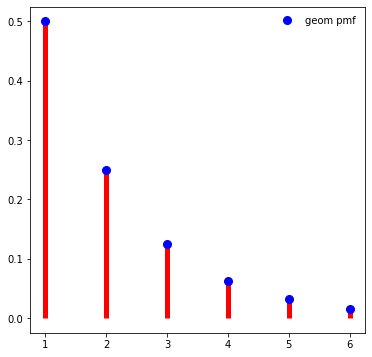

In [14]:
p = 0.5
x = np.arange(stats.geom.ppf(0.01, p),
              stats.geom.ppf(0.99, p))
y = stats.geom.pmf(x, p)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(x, y, 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, y, 'r', linewidth = 5)
ax.legend(loc='best', frameon=False);

In [15]:
# What's the mean of the distribution above? Why?

stats.geom(p=0.5, loc=0).mean()

2.0

Let's see if we can confirm this by taking samples:

In [16]:
samples = []
for _ in range(1000):
    samples.append(np.mean(stats.geom(p=0.5, loc=0).rvs(size=1000)))

np.mean(samples)

2.00049

In [17]:
# What's the median of the distribution above? Why?

stats.geom(p=0.5, loc=0).median()

1.0

### Negative Binomial

The negative binomial distribution describes the probability of getting the $r^{th}$ success (of a binary process) on the $n^{th}$ trial.

Its pdf looks like this:

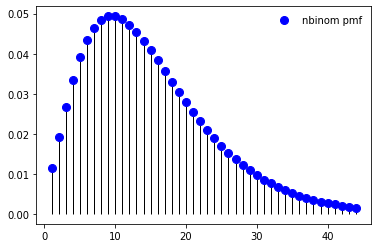

In [18]:
n = 3
p = 1 / 6

fig, ax = plt.subplots(1, 1)
prob = stats.nbinom(n, p)
x = np.arange(stats.nbinom.ppf(0.01, n, p),
              stats.nbinom.ppf(0.99, n, p))
ax.plot(x, stats.nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, prob.pmf(x), colors='k', linestyles='-', lw=1)
ax.legend(loc='best', frameon=False);

For example, what are the chances that it takes me exactly twenty rolls of a fair die before finally rolling two 6's?

The equation is given by the following:

$\large P_{negbinom}(n, r, p) = $$\large(n - 1)\choose\large(r - 1)$$\large p^r(1 - p)^{n - r}$.

Let's explain this:

If the $r^{th}$ success is going to come on the $n^{th}$ trial, then how many successes should I have on the first $n - 1$ trials?

How many failures will I have in the first $n - 1$ trials?

So, to answer our example question, we have:

$\large P_{negbinom}(20, 2, 1/6) = $$\large19\choose\large 1$$\large (1/6)^2(5/6)^{18}$

In [19]:
# Let's calculate this here:

19 * (1/6)**2 * (5/6)**18

0.019823880511487525

In [20]:
# Let's check our math against scipy's!

# We'll use `stats.nbinom()`, specifying:
    # p, the probability of success on a single trial;
    # n, the number of successes; and, inside the .pmf() method, we'll specify:
    
    # k, the number of failures

stats.nbinom(n=2, p=1/6).pmf(k=18)

0.019823880511487542

(Note that the geometric distribution is a special case of the negative binomial distribution.)

There is only a 2% chance that this will happen!

The mean of this distribution is $\large\mu = \frac{r}{p}$ (does this make sense?), <br/>

and the std of this distribution is $\large\sigma = \frac{\sqrt{r(1 - p)}}{p}$

### Your turn!

Suppose I roll a 100-sided die. What are the chances that I roll my 3rd '98' on the 27th roll of the die?

In [21]:
# Your code here!

stats.nbinom(n=3, p=.1).pmf(k=24)

0.025924093999983567

## Continuous Distributions

### Center, Spread, Shape

Of _any_ distribution it is natural to ask about its center, its spread, and its shape. The 'center' refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

For a discrete distribution:

mean = $\Large\mu = \frac{\Sigma^n_{i = 1}x_i}{n}$

For a continuous distribution:

mean = $\Large\mu = \int_Xxp(x)dx$, <br/> where $p(x)$ is the probability density function associated with the distribution $X$ (see below).

**Question: How does this formula for continuous-distribution means relate to the formula for discrete-distribution means?**

**Question: How would we make sense of the notions of median and mode for continuous random variables?**

The 'spread' refers loosely to how far away the more extreme values are from the center, and is measured more precisely by the notion of the standard deviation, which is effectively a measure of the *average distance away from the mean*.

For a discrete distribution:

std = $\Large\sigma = \sqrt{\frac{\Sigma^n_{i = 1}(x_i - \mu)^2}{n}}$

For a continuous distribution:

std = $\Large\sigma = \sqrt{\int_X(x - \mu)^2p(x)dx}$, <br/> where again $p(x)$ is the probability density function of X.

The 'shape' refers loosely to how the probability of obtaining certain values changes as a function of where we are in the distribution. Are middle or extreme values more probable? Is the distribution symmetric about the middle or not?

### Probability Density Function and Cumulative Distribution Function

The $\bf{probability\ density\ function\ (pdf)}$ plays the same role for continuous distributions that the pmf plays for discrete distributions.

Since a continuous random variable can take any of an _infinite_ number of values, it doesn't make sense to speak of the probability that the variable take any particular value. Think of throwing a dart at a dartboard. The chance that the dart hit any particular point on the board is _zero_. But we can still make sense of the idea of the probability of the variable taking a value _in a particular range_, and this is why we use the word 'density' for continuous distributions.

The $\bf{cumulative\ distribution\ function\ (cdf)}$ gives, at any value $x$, the probability that a continuous variable take a value that is _less than or equal to $x$_.

The cdf will therefore be, for any distribution, a monotonically increasing (or, strictly, nondecreasing) function. That is, $cdf(x_2) \geq cdf(x_1)$ if $x_2 \geq x_1$.

[Here's](http://www.mas.ncl.ac.uk/~nmf16/teaching/mar1002/lect07.pdf) a helpful document on continuous random variables.

### Uniform

The uniform distribution applies when all possible values of the variable are _equally probable_. If I'm running a random number generator to select a number between 0 and 1, then the generator won't be any good unless all such numbers are equally likely to be chosen.

In [22]:
# Let's look at the random module's RNG:

import random

In [23]:
random.random()

0.9818837009760752

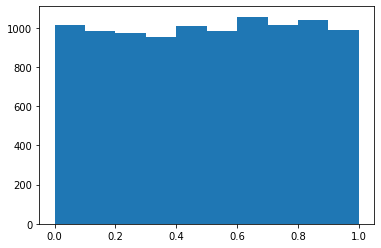

In [29]:
# How could we use a histogram to test whether this RNG is working?

nums = []
for _ in range(10000):
    nums.append(random.random())
    
fig, ax = plt.subplots()
ax.hist(nums);

$\Large f(x) = \frac{1}{b - a}$

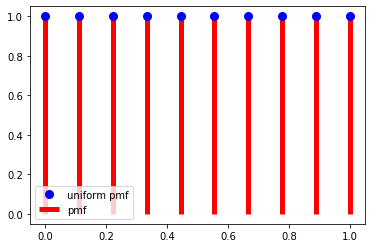

In [30]:
x = np.linspace(stats.uniform.ppf(0),
               stats.uniform.ppf(1), 10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.uniform.pdf(x),
         'bo', ms=8, label = 'uniform pmf')
ax.vlines(x, 0, stats.uniform.pdf(x), 'r', lw=5, label='pmf')
ax.legend(loc='best');

Here's a derivation of the variance for a uniform distribution:

We have, in the general case, that:

$\sigma^2 = \int(x - \mu)^2\rho(x)dx$

In our case $\mu = \frac{a+b}{2}$ and $\rho(x) = \frac{1}{b-a}$

So we have:

$\sigma^2 = \frac{1}{b-a}\int\left(x - \frac{a+b}{2}\right)^2dx$

$\sigma^2 = \frac{1}{b-a}\int\left(x^2 - (a+b)x + \frac{(a+b)^2}{4}\right)dx$

$\sigma^2 = \frac{1}{b-a}\left[\frac{x^3}{3} - \frac{(a+b)x^2}{2} + \frac{(a+b)^2x}{4}\right]\bigg|^b_a$

$\sigma^2 = \frac{1}{b-a}\left[\frac{b^3}{3} - \frac{ab^2}{2} - \frac{b^3}{2} + \frac{a^2b}{4} + \frac{2ab^2}{4} + \frac{b^3}{4} - \frac{a^3}{3} + \frac{a^3}{2} + \frac{a^2b}{2} - \frac{a^3}{4} - \frac{2a^2b}{4} - \frac{ab^2}{4}\right]$

$\sigma^2 = \frac{1}{b-a}\left[\frac{b^3}{12} -\frac{ab^2}{4} + \frac{a^2b}{4} - \frac{a^3}{12}\right]$

$\sigma^2 = \frac{1}{b-a}\frac{(b-a)^3}{12}$

$\sigma^2 = \frac{(b-a)^2}{12}$

### Normal

The normal distribution describes many phenomena. Think of anything that has a typical range:
- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

Similarly, there are large elephants and there are small elephants, but most elephants are near the average size.

The normal distribution is _very_ common in nature (**Why?**) and will arise often in your work. Get to know it well!

$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]$

You can get Euler's number $e$ from `numpy.e` or (the method) `numpy.exp()`.

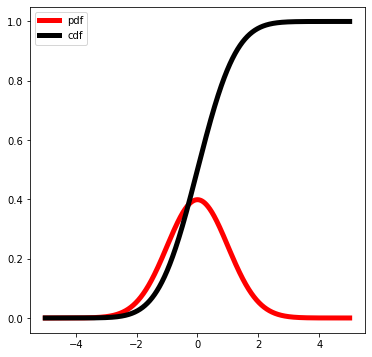

In [31]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = stats.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = stats.norm.cdf(x, mu, sigma) # the normal cdf

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y_pdf, 'r', label='pdf', linewidth=5)
ax.plot(x, y_cdf, 'k', label='cdf', linewidth=5)
ax.legend(loc='best');

The binomial distribution tends to the normal distribution in the limit as $n\rightarrow \infty$:

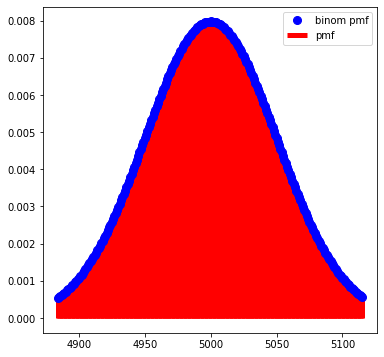

In [32]:
n = 10000
p = 0.5
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=5,
          label='pmf')
ax.legend(loc='best');

### Exponential

The exponential distribution is like the continuous analog of the geometric distribution. It often answers the question: "How long will I have to wait before ... ?"

Think, for example, of the rate at which you receive spam emails. There is no regular pattern to the incoming of spam emails, but we can think about how what the probability is that you will have to wait a certain amount of time for the next to come in. And, in particular, the _longer_ you wait, the higher the probability will be that the next spam email will come soon.

Exponential distributions also describe the decay of radioactive materials. There is a high probability that you'll have to wait a very short time before a chunk of radioactive material decays, but there is a very small probability that you'll have to wait a long time.

$\Large f(x) = \lambda e^{-\lambda x}$, for $x \geq 0$.
Otherwise $\large f(x) = 0$.

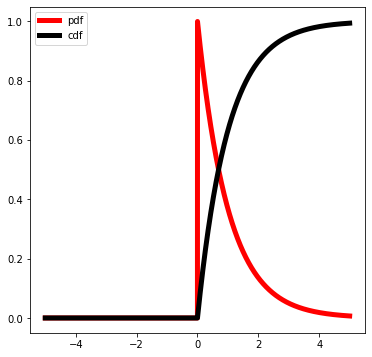

In [33]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = stats.expon.pdf(x, mu, sigma) # the exponential pdf
y_cdf = stats.expon.cdf(x, mu, sigma) # the exponential cdf


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y_pdf, 'r', label='pdf', linewidth=5)
ax.plot(x, y_cdf, 'k', label='cdf', linewidth=5)
ax.legend();

## Sampling and the Central Limit Theorem

Recall the difference between sample and population. Statisticians (and data scientists!) are often in the position of making predictions about some population based on a sample drawn from that population:

- I interview 100 Washingtonians and take their responses to be representative of state opinions generally.

- I measure the lengths of 200 fish in Puget Sound and speculate about the lengths of _all_ the fish in the Sound.

Question: Are the _statistics_ I calculate on my sample representative of the statistics of the population?

Note: The difference between a sample statistic and the population statistic is called the **sampling error**.

Reflection: What factors might be responsible for a large (or small) sampling error?

Suppose I take many samples and calculate statistics on each. Would _those_ illuminate the population statistics?

The Central Limit Theorem (CLT) says that, under suitable conditions, the sum of independent random variables will converge to a normal distribution in the limit as the number of variables increases infinitely. The CLT will often hold _even when_ the underlying random variables are _not_ themselves normally distributed!

Let's look at some examples:

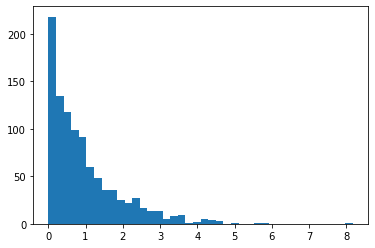

In [34]:
# Let's start with 1000 draws from an exponential distribution.

test = stats.expon.rvs(size=1000, random_state=42)

fig, ax = plt.subplots()
ax.hist(test, bins=40);

In [41]:
# Let's look at the means of samples from this exponential distribution.
# Let's also experiment with the number of samples we draw.

means = []

for _ in range(60000):
    means.append(np.mean(stats.expon.rvs(size=100)))

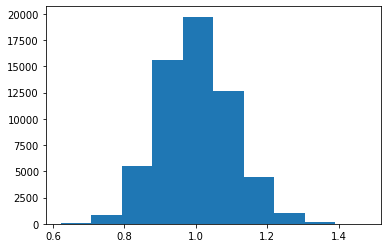

In [42]:
# Let's make a histogram. Suppose we choose about 50 bins.

fig, ax = plt.subplots()
ax.hist(means);

In [47]:
# Now let's try the same thing for binomial random variates.
# We'll use 100 single trials. We can tinker with p.

means = []

for _ in range(10):
    means.append(np.mean(stats.binom.rvs(1,0,.5, size=100)))

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

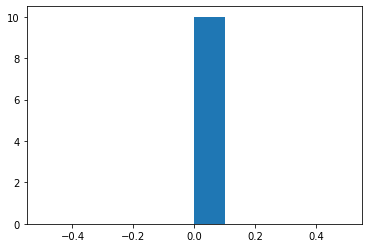

In [48]:
# Plotting here
fig, ax = plt.subplots()
ax.hist(means)



In [50]:
# Let's try it for standard deviations of a geometric distribution.


stds = []

for _ in range(10000):
    stds.append(np.std(stats.geom.rvs(p=.5, size=100)))

(array([  14.,  254., 1576., 3351., 2834., 1410.,  416.,  117.,   24.,
           4.]),
 array([0.71407283, 0.88219842, 1.05032402, 1.21844961, 1.38657521,
        1.55470081, 1.7228264 , 1.890952  , 2.0590776 , 2.22720319,
        2.39532879]),
 <a list of 10 Patch objects>)

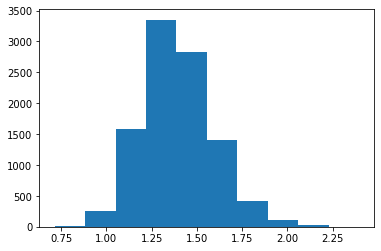

In [51]:
# Plot
fig, ax = plt.subplots()
ax.hist(stds)



### So why do we, as data scientists, care about the Central Limit Theorem?

In [52]:
# multiple samples' statisticcs will tend to normal distribution in the limit as we take more samples.
# can get sense of population parameters like mean & standard deviation